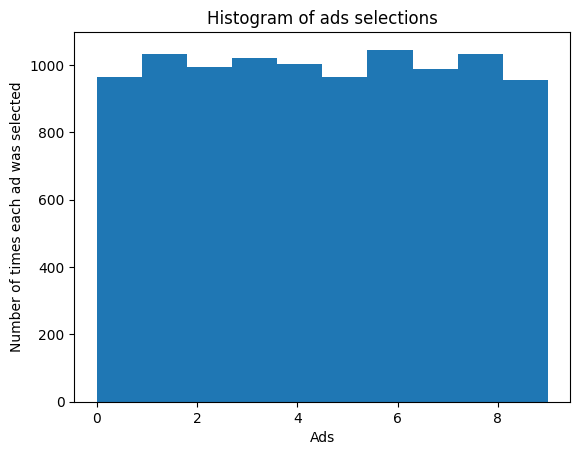

In [1]:
# Line 1: ---------------------------- RANDOM SELECTION ALGORITHM IMPLEMENTATION ----------------------------

# Line 2: Import necessary libraries for numerical computation, data handling, and plotting
import numpy as np                  # Line 3: NumPy for numerical operations
import matplotlib.pyplot as plt     # Line 4: Matplotlib for data visualization (plotting histograms)
import pandas as pd                 # Line 5: Pandas for reading and manipulating structured data

# Line 6: ---------------------------- DATA IMPORT ----------------------------

# Line 7: Load the dataset which contains user click behavior on different ads
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')  # Line 8: Each row = a round (user session), each column = ad (10 ads)

# Line 9: ---------------------------- RANDOM SELECTION LOGIC ----------------------------

import random                       # Line 10: Import random module for random number generation

N = 10000                           # Line 11: Total number of user sessions (rounds)
d = 10                              # Line 12: Total number of different ads (columns in the dataset)

ads_selected = []                  # Line 13: This list stores which ad was selected in each round
total_reward = 0                   # Line 14: Keeps track of the total number of ad clicks (i.e., total reward)

# Line 15: Iterate over each round and randomly select an ad to display
for n in range(0, N):              # Line 16: Loop through all 10,000 rounds
    ad = random.randrange(d)       # Line 17: Randomly choose an ad index between 0 and 9
    ads_selected.append(ad)        # Line 18: Store the selected ad in the list for analysis later
    reward = dataset.values[n, ad] # Line 19: Get reward from dataset: 1 if user clicked on the ad, 0 otherwise
    total_reward += reward         # Line 20: Add the reward (click or no click) to total

# Line 21: ---------------------------- RESULT VISUALIZATION ----------------------------

# Line 22: Plot a histogram to show the distribution of ad selections
plt.hist(ads_selected)             # Line 23: Create histogram showing how many times each ad was selected
plt.title('Histogram of ads selections')      # Line 24: Title of the plot
plt.xlabel('Ads')                             # Line 25: X-axis label (Ad number from 0 to 9)
plt.ylabel('Number of times each ad was selected')  # Line 26: Y-axis label (Frequency of selection)
plt.show()                         # Line 27: Display the histogram


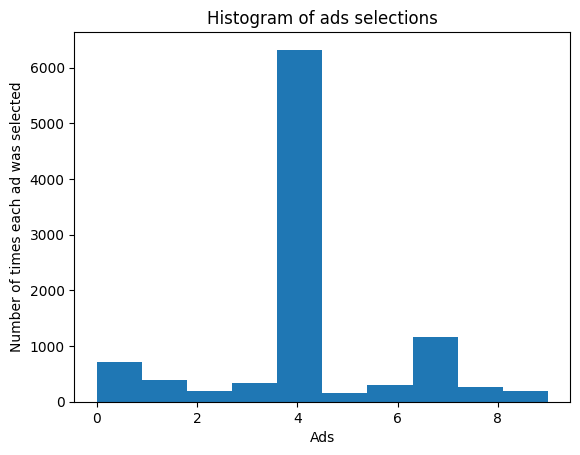

In [2]:
# Line 1: ---------------------------- IMPORT LIBRARIES ----------------------------

import numpy as np                      # Line 2: NumPy for numerical array operations
import matplotlib.pyplot as plt         # Line 3: Matplotlib for visualization
import pandas as pd                     # Line 4: Pandas for data manipulation

# Line 5: ---------------------------- LOAD DATASET ----------------------------

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
# Line 6: Each row = a user interaction (round); each column = ad (10 total)
# Dataset holds binary values: 1 = clicked, 0 = not clicked

# Line 7: ---------------------------- UCB ALGORITHM ----------------------------

import math                             # Line 8: Math module for logarithmic and square root operations

N = 10000                               # Line 9: Total number of rounds (users exposed to ads)
d = 10                                  # Line 10: Number of ads (10 ad options)

ads_selected = []                       # Line 11: Track selected ads for each round
numbers_of_selections = [0] * d         # Line 12: Number of times each ad has been selected (initialize to 0)
sums_of_reward = [0] * d                # Line 13: Cumulative reward for each ad
total_reward = 0                        # Line 14: Overall reward across all ads and rounds

# Line 15: Iterate over each user interaction (round)
for n in range(0, N):                   # Line 16: Loop through each round
    ad = 0                              # Line 17: Initialize ad choice
    max_upper_bound = 0                 # Line 18: Track highest upper bound for ad selection

    for i in range(0, d):               # Line 19: Loop through each ad (0 to 9)
        if numbers_of_selections[i] > 0:  # Line 20: If ad has already been selected
            # Calculate average reward for ad i
            average_reward = sums_of_reward[i] / numbers_of_selections[i]  # Line 21
            # Calculate confidence interval using UCB formula
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])  # Line 22
            upper_bound = average_reward + delta_i  # Line 23: UCB = exploitation + exploration
        else:
            upper_bound = 1e400         # Line 25: If ad never selected, set upper bound very high to ensure it's picked

        if upper_bound > max_upper_bound:  # Line 26: Check if current ad has the best UCB so far
            max_upper_bound = upper_bound  # Line 27: Update highest UCB
            ad = i                          # Line 28: Select this ad

    ads_selected.append(ad)                # Line 29: Store the selected ad
    numbers_of_selections[ad] += 1         # Line 30: Increment count of selections for this ad
    reward = dataset.values[n, ad]         # Line 31: Get reward (1 or 0) for this round's selected ad
    sums_of_reward[ad] += reward           # Line 32: Add reward to total reward for that ad
    total_reward += reward                 # Line 33: Add reward to overall reward counter

# Line 34: ---------------------------- VISUALIZE SELECTION RESULTS ----------------------------

plt.hist(ads_selected)                    # Line 35: Histogram showing how often each ad was selected
plt.title('Histogram of ads selections') # Line 36: Title of the plot
plt.xlabel('Ads')                         # Line 37: Label for x-axis (ad index)
plt.ylabel('Number of times each ad was selected')  # Line 38: Label for y-axis (frequency)
plt.show()                                # Line 39: Render the plot
